In [2]:
import yfinance as yf
import pandas as pd
import numpy as np

In [10]:
ativos = ['WEGE3.SA','OIBR3.SA','CASH3.SA','ETH-USD','USDBRL=X']

In [11]:
inicio = '2020-12-28'
fim = '2021-10-07'

In [12]:
precos = pd.DataFrame()

In [13]:
for i in ativos:
    precos[i] = yf.download(i,start=inicio,end=fim)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [14]:
precos['ETH-BRL'] = precos['ETH-USD']*precos['USDBRL=X']

In [15]:
precos = precos.drop(columns=['ETH-USD','USDBRL=X'])

In [16]:
normalizado = precos/precos.iloc[0]

<AxesSubplot:xlabel='Date'>

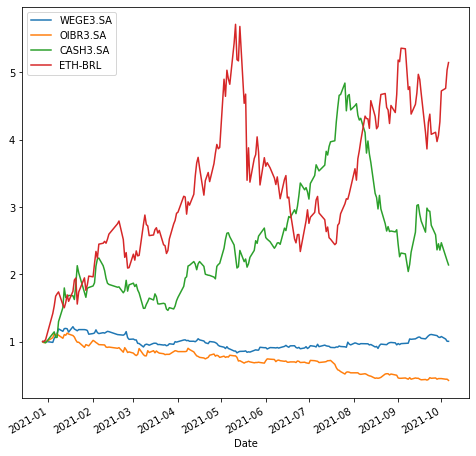

In [17]:
normalizado.plot(figsize = (8,8))

In [18]:
compras = {'WEGE3.SA':50,'OIBR3.SA':50,'CASH3.SA':50,'ETH-BRL':50}

In [19]:
compras_df = pd.Series(data=compras, index=list(compras.keys()))

In [20]:
sum(compras.values())

200

In [21]:
primeiro = precos.iloc[0]

In [22]:
qtd_acoes = compras_df/primeiro

In [23]:
PL = precos*qtd_acoes

In [24]:
PL.head()

,WEGE3.SA,OIBR3.SA,CASH3.SA,ETH-BRL
Date,,,,
2020-12-28,50.000000,50.000000,50.000000,50.000000
2020-12-29,49.768221,49.099100,49.738545,50.370682
2020-12-30,50.158948,49.549550,49.052277,51.386644
2021-01-04,49.417225,52.927925,55.751626,70.890569
2021-01-05,52.450335,55.855856,57.222217,76.456988


In [25]:
PL['PL TOTAL'] = PL.iloc[:].sum(axis = 1)

In [26]:
PL.head()

,WEGE3.SA,OIBR3.SA,CASH3.SA,ETH-BRL,PL TOTAL
Date,,,,,
2020-12-28,50.000000,50.000000,50.000000,50.000000,200.000000
2020-12-29,49.768221,49.099100,49.738545,50.370682,198.976549
2020-12-30,50.158948,49.549550,49.052277,51.386644,200.147418
2021-01-04,49.417225,52.927925,55.751626,70.890569,228.987345
2021-01-05,52.450335,55.855856,57.222217,76.456988,241.985395


In [27]:
ibov = yf.download('^BVSP',start=inicio,end=fim)

[*********************100%***********************]  1 of 1 completed


In [28]:
ibov.rename(columns={'Adj Close':'IBOV'}, inplace = True)

In [29]:
ibov = ibov.drop(ibov.columns[[0,1,2,3,5]], axis=1)

In [30]:
ibov.index = pd.to_datetime(ibov.index)

In [31]:
PL.index = pd.to_datetime(PL.index)

In [33]:
novo_df = pd.merge(ibov,PL,how='inner',on='Date')

In [35]:
PL.head()

,WEGE3.SA,OIBR3.SA,CASH3.SA,ETH-BRL,PL TOTAL
Date,,,,,
2020-12-28,50.000000,50.000000,50.000000,50.000000,200.000000
2020-12-29,49.768221,49.099100,49.738545,50.370682,198.976549
2020-12-30,50.158948,49.549550,49.052277,51.386644,200.147418
2021-01-04,49.417225,52.927925,55.751626,70.890569,228.987345
2021-01-05,52.450335,55.855856,57.222217,76.456988,241.985395


In [36]:
PL_normalizado = novo_df/novo_df.iloc[0]

In [37]:
PL_normalizado.head()

,IBOV,WEGE3.SA,OIBR3.SA,CASH3.SA,ETH-BRL,PL TOTAL
Date,,,,,,
2020-12-28,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2020-12-29,1.003561,0.995364,0.981982,0.994771,1.007414,0.994883
2020-12-30,1.002142,1.003179,0.990991,0.981046,1.027733,1.000737
2021-01-04,0.995859,0.988344,1.058559,1.115033,1.417811,1.144937
2021-01-05,1.001445,1.049007,1.117117,1.144444,1.529140,1.209927


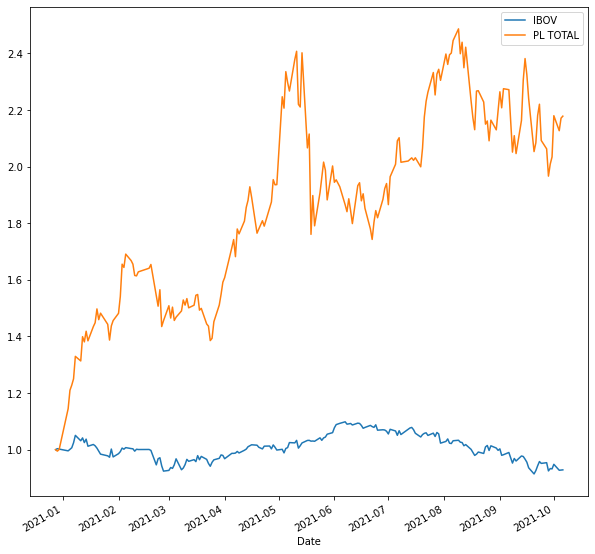

In [42]:
PL_normalizado[['IBOV','PL TOTAL']].plot(figsize=(10,10));